In [1]:
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_results(graph_name):
    general_results = []

    for p in [0.3, 0.5, 0.8]:
        results = []
        for file in glob.glob(f'results/b/{graph_name}/p-{p}/*.csv'):
            df = pd.read_csv(file)
            df = df.apply(lambda x: x.value_counts(normalize = True), axis = 1).fillna(0)
            results.append(df)
        general_results.append(pd.concat(results))
    return general_results

# Task A

For all tasks (except F) I've used following graph topologies with specified parameters:
- 2D Lattice 10x10 nodes,
- Random Graph (Erdos Renyi Graph) with 100 nodes and probability of connection $p=0.5$,
- Watts-Strogatz Graph with 100 nodes with ring connection $k=4$ and probability of rewiring $p=0.5$,
- Barabasi Albert Graph with 100 nodes and with connection of new node to $m=4$.

# Task B

In this part of notebook I'll present results of simulations for specified above topologies. The script `run_simulations_b.py` contain configuration and calls of function which conduct appropriate simulations. The function which is resposible for that simulation is written genericly to all types of networkx's graphs and is in script `simulations/sir_on_graph.py`.

There was 100 simulation steps for every graph and every $p$ from `[0.3, 0.5, 0.8]`. As a starting point I've always used first node in the graph. Next I've plotted results which were mean of simulation for every time step. Additionaly I've plotted (where it was possible due to length of the sample) standard deviations.

### Grid Lattice

In [3]:
lattice_results = generate_results('lattice')

##### $p = 0.3$

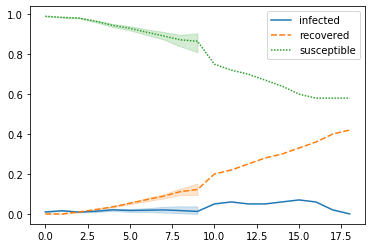

In [4]:
sns.lineplot(data = lattice_results[0])

##### $p = 0.5$

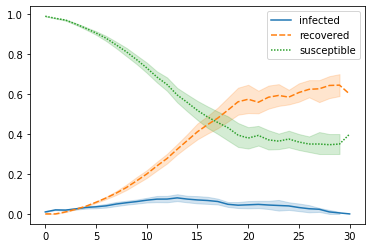

In [5]:
sns.lineplot(data = lattice_results[1])

##### $p = 0.8$

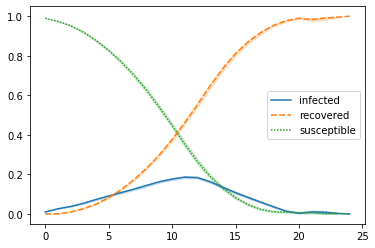

In [6]:
sns.lineplot(data = lattice_results[2])

### Random Graph

In [7]:
random_results = generate_results('random')

##### $p = 0.3$

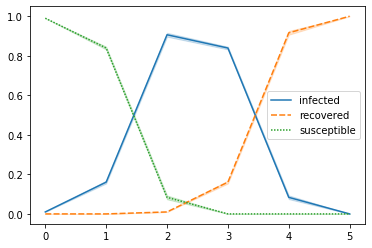

In [8]:
sns.lineplot(data = random_results[0])

##### $p = 0.5$

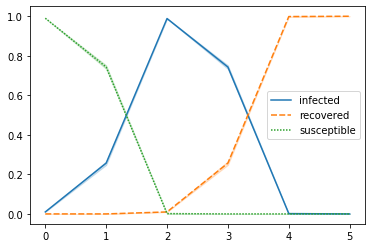

In [9]:
sns.lineplot(data = random_results[1])

##### $p = 0.8$

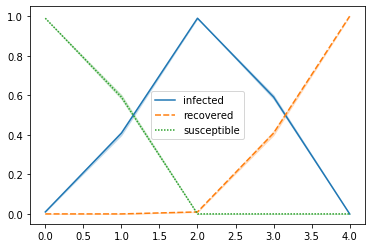

In [10]:
sns.lineplot(data = random_results[2])

### Watts-Strogatz Graph

In [11]:
watts_strogatz_results = generate_results('watts_strogatz')

##### $p = 0.3$

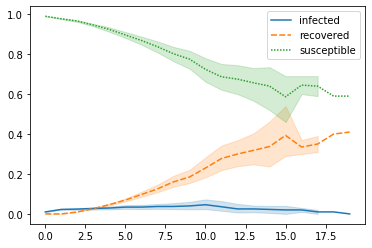

In [12]:
sns.lineplot(data = watts_strogatz_results[0])

##### $p = 0.5$

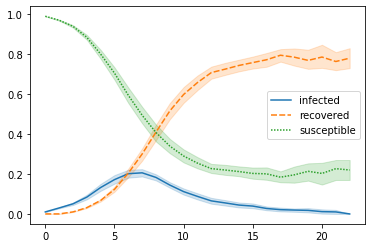

In [13]:
sns.lineplot(data = watts_strogatz_results[1])

##### $p = 0.8$

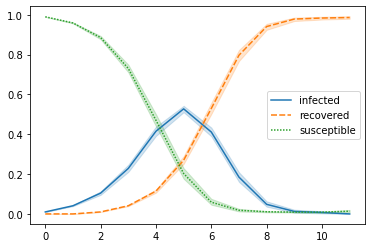

In [14]:
sns.lineplot(data = watts_strogatz_results[2])

### Barabasi-Albert Graph

In [15]:
barabasi_albert_results = generate_results('barabasi_albert')

##### $p = 0.3$

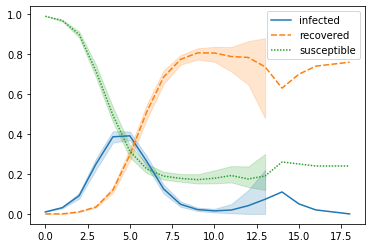

In [16]:
sns.lineplot(data = barabasi_albert_results[0])

##### $p = 0.5$

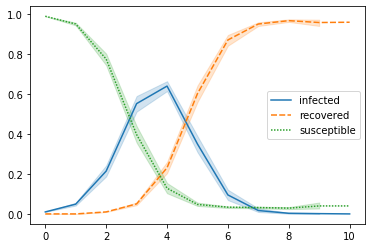

In [17]:
sns.lineplot(data = barabasi_albert_results[1])

##### $p = 0.8$

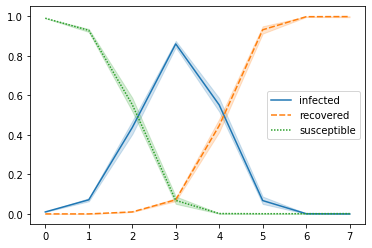

In [18]:
sns.lineplot(data = barabasi_albert_results[2])

# Task C

We can observe that nature of infected, recovered and susceptible people on graph and in standard ODE model are very similary. It's worth to notice that shape of this curves highly depends of network topology. For all models we observer trend that with higher $p$ it's more likely to have epidemy. The case of random graph topology is very interesting because even for quite small $p=0.3$ we observe epidemy. It may be connected to the fact that this topology has many connections and it's easier for desease to spread through whole network. On the other hand the most 'robust' for epidemy is grid lattice topology. It's also quite understandable because this network has not so many connections (max. 4 for one node) and it's harder to reach every single node. Moreover the one more interesting thing is time of the highest value of infected people and duration of whole process. We can observer that with higher $p$ the times are shorter. The last interesting fact is that we can observe `flatten the curve` effect when we get lower $p$ values, especially for for Watts-Strogatz model.